# Exploratory Data Analysis

Chapter 1, Lesson 1

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from distribution import Pmf, Cdf

## Loading and validation

Downloaded November 16, 2018:

* ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NSFG 

* ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NSFG/stata/

In [2]:
nsfg = utils.read_stata('data/2013_2015_FemPregSetup.dct', 
                        'data/2013_2015_FemPregData.dat.gz',
                        compression='gzip')

In [ ]:
# TODO: resample

In [3]:
nsfg.to_hdf('nsfg.hdf5', 'nsfg')

In [5]:
%time nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')

CPU times: user 8 ms, sys: 12 ms, total: 20 ms
Wall time: 18.1 ms


In [3]:
type(nsfg)

pandas.core.frame.DataFrame

In [4]:
nsfg.shape

(9358, 278)

In [5]:
nsfg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,howenddk,nbrnaliv,...,secu,sest,cmintvw,cmlstyr,cmjan3yr,cmjan4yr,cmjan5yr,quarter,phase,intvwyear
0,60418,1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
1,60418,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
2,60418,3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
3,60419,1,33.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,...,3,318,1388,1376,1345,1333,1321,16,1,2015
4,60420,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,1,339,1388,1376,1345,1333,1321,16,1,2015


In [6]:
nsfg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'howenddk', 'nbrnaliv',
       ...
       'secu', 'sest', 'cmintvw', 'cmlstyr', 'cmjan3yr', 'cmjan4yr',
       'cmjan5yr', 'quarter', 'phase', 'intvwyear'],
      dtype='object', length=278)

## birthwgt_lb1




In [7]:
birth_weight_lb = nsfg['birthwgt_lb1']

In [8]:
type(birth_weight_lb)

pandas.core.series.Series

In [9]:
birth_weight_lb.name

'birthwgt_lb1'

In [10]:
birth_weight_lb.mean()

8.055204317656129

In [11]:
birth_weight_lb.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [12]:
birth_weight_lb.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [13]:
birth_weight_lb_clean = birth_weight_lb.replace([98, 99], np.nan)
birth_weight_lb_clean.mean()

6.703286384976526

In [14]:
nsfg['birthwgt_lb1'].replace([98, 99], np.nan, inplace=True)

In [15]:
nsfg['birthwgt_lb1'].describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

In [16]:
# exercise
birth_weight_lb.std()

1.4292645483427953

In [17]:
birth_weight_lb_clean.std()

1.4292645483427953

## birthwgt_oz1




In [18]:
birth_weight_oz = nsfg['birthwgt_oz1']

In [19]:
birth_weight_oz.describe()

count    6391.000000
mean        7.213895
std         8.254885
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        99.000000
Name: birthwgt_oz1, dtype: float64

In [20]:
birth_weight_oz.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64

In [21]:
nsfg['birthwgt_oz1'].replace([98, 99], np.nan, inplace=True)

## Total weight

In [22]:
nsfg['birth_weight'] = nsfg['birthwgt_lb1'] + nsfg['birthwgt_oz1'] / 16.0

In [23]:
nsfg['birth_weight'].describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
Name: birth_weight, dtype: float64

In [24]:
nsfg['birth_weight'].value_counts().sort_index()

0.0000     1
0.1250     1
0.8125     1
0.8750     2
0.9375     1
1.0000     4
1.0625     3
1.1250     2
1.1875     2
1.2500     2
1.3750     3
1.4375     2
1.5000     4
1.5625     1
1.6250     2
1.6875     1
1.8125     2
1.8750     3
1.9375     3
2.0000     5
2.0625     1
2.1250     4
2.1875     5
2.2500     3
2.3125     2
2.3750     1
2.4375     4
2.5000     6
2.5625     3
2.6250     2
          ..
10.0625    7
10.1250    6
10.1875    5
10.2500    5
10.3125    2
10.3750    6
10.4375    4
10.5000    4
10.5625    7
10.6250    2
10.6875    6
10.7500    1
10.8750    1
10.9375    3
11.0000    4
11.1250    1
11.1875    4
11.2500    2
11.3750    1
11.5000    1
11.5625    1
11.7500    1
11.9375    2
12.0000    3
12.1250    1
12.3125    1
12.3750    2
13.1250    2
14.0000    2
17.9375    1
Name: birth_weight, Length: 176, dtype: int64

In [25]:
# ValueError: cannot convert float NaN to integer
# can't handle NaN
    
# sns.distplot(nsfg['birth_weight'])

In [26]:
import warnings
warnings.simplefilter('ignore', UserWarning)

Text(0.5,1,'NSFG 2013-15 Live Births')

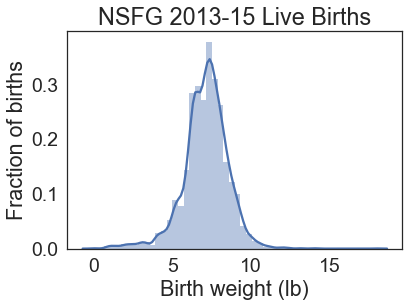

In [27]:
# ValueError: max must be larger than min in range parameter.
# plt.hist can't handle NaN
    
sns.distplot(nsfg['birth_weight'].dropna())
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.title('NSFG 2013-15 Live Births')

### prglngth



In [28]:
preterm = nsfg['prglngth'] < 37

In [29]:
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [30]:
type(preterm)

pandas.core.series.Series

In [31]:
preterm.sum()

3742

In [32]:
preterm.mean()

0.39987176747168196

In [33]:
full_term_weight = nsfg.loc[~preterm, 'birth_weight']

Text(0.5,1,'NSFG 2013-15 Live Births')

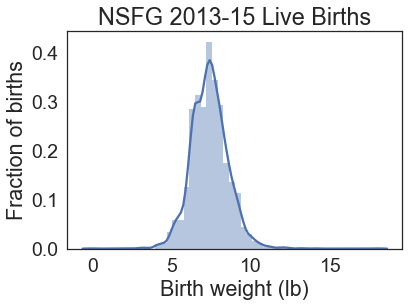

In [34]:
sns.distplot(full_term_weight.dropna())
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.title('NSFG 2013-15 Live Births')

In [35]:
full_term_weight.mean()

7.372323879231473

## nbrnaliv

https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/815953?studyNumber=9999&vg=10264

In [36]:
single = nsfg['nbrnaliv'] == 1

In [37]:
single.sum()

6379

In [38]:
single.mean()

0.6816627484505237

In [39]:
(~preterm & single).sum()

5529

In [40]:
(~preterm & single).mean()

0.5908313742252618

In [41]:
full_term_single_weight = nsfg.loc[~preterm & single, 'birth_weight']

In [42]:
full_term_single_weight.mean()

7.385643450184502

In [43]:
~single.sum()

-6380

In [44]:
full_term_multiple_weight = nsfg.loc[~preterm & ~single, 'birth_weight']

In [45]:
full_term_multiple_weight.mean()

5.768055555555556

Text(0.5,1,'NSFG 2013-15 Live Births')

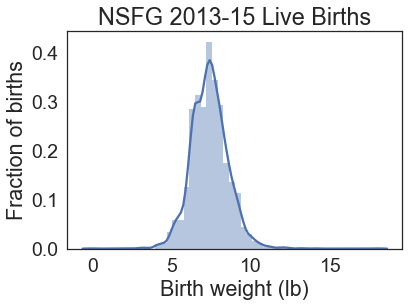

In [34]:
sns.distplot(full_term_weight.dropna())
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.title('NSFG 2013-15 Live Births')

## Exercises

In [64]:
agecon = nsfg['agecon']

In [65]:
agecon.mean() / 100

24.46330198760419

In [66]:
live = nsfg['outcome'] == 1

In [67]:
live.sum()

6489

In [68]:
live.mean()

0.6934173968796752

In [69]:
agecon = nsfg.loc[live, 'agecon'] / 100

In [70]:
agecon.describe()

count    6489.000000
mean       24.436380
std         5.661832
min         7.500000
25%        19.910000
50%        23.750000
75%        28.500000
max        42.080000
Name: agecon, dtype: float64

Text(0.5,1,'NSFG 2013-15 Live Births')

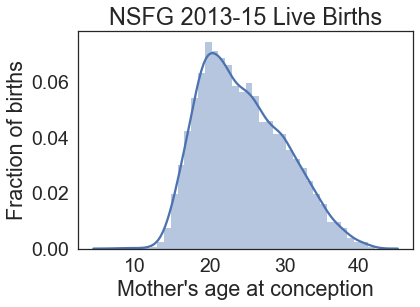

In [71]:
sns.distplot(agecon.dropna())
plt.xlabel("Mother's age at conception")
plt.ylabel('Fraction of births')
plt.title('NSFG 2013-15 Live Births')